In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('real_estate_price_size.csv')
df.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [3]:
df.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


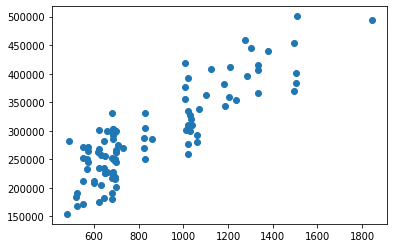

In [4]:
plt.scatter(df['size'], df['price'])

$$ \text{Hypothesis: } h_\theta(x) = \theta_0 + \theta_1 x $$
$$ \text{Cost Function: } J(\theta_0, \theta_1) = \frac{1}{2m} \sum(\hat{y_i} - y_i)^2 $$

In [6]:
X = df['size']
Y = df['price'].to_numpy()
difference = (np.max(X) - np.min(X)) # Scaling
X = np.c_[np.ones(df.shape[0]), X / difference]

In [7]:
X[:5]

array([[1.        , 0.47190261],
       [1.        , 0.48153747],
       [1.        , 0.3575758 ],
       [1.        , 1.10419296],
       [1.        , 0.93593883]])

In [8]:
iterations = 1500
alpha = 0.01

In [9]:
def compute_cost(X, Y, theta):
    m = len(Y)
    J = (1/(2*m)) * sum((np.matmul(X, theta) - Y)**2)
    return J

In [10]:
def gradient_descent(X, Y, theta, alpha, n_iterations):
    m = len(Y)
    J_history = []
    
    for kk in range(n_iterations):
        tmp_0 = theta[0] - alpha * (1/m) * sum(np.matmul(X, theta) - Y)
        tmp_1 = theta[1] - alpha * (1/m) * sum(np.multiply(np.matmul(X, theta) - Y, X[: ,1]))
        theta = [tmp_0, tmp_1]
        J_history.append(compute_cost(X, Y, theta))
        
    return J_history, theta

In [11]:
J_history, theta = gradient_descent(X, Y, [0, 0], alpha, iterations)

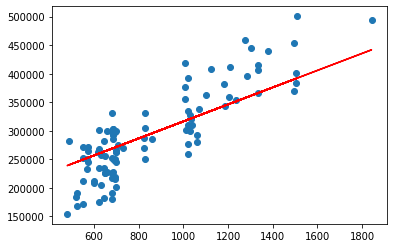

In [13]:
plt.scatter(X[:, 1]*difference, Y)
plt.plot(X[:,1]*difference, np.matmul(X,theta), c='r')
plt.show()